In [20]:
# linear regression

# import modules
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model as lm

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf


from create_dataframe import create_warming_df

In [2]:
# function for creating X and y dataframes
def process_data(data):
    X = data.drop(['avg_indicator'], axis = 1)
    y = data.loc[:, 'avg_indicator']
    return X, y

In [3]:
# import pre-cleaned dataframe
df = create_warming_df()
df

,name,ISO3,region,region_id,latitude,longitude,avg_indicator,coastline_km,coast_area_ratio,total_area,...,percent_water,eco_footprint,biocapacity,carbon_intensity_2018,population,pop_density_km,avg_elevation_km,max_elevation_km,min_elevation_km,annual_precipitation_avg_mm
0,afghanistan,AFG,Asia,0,33.000000,65.000000,0.459623,0.0,0.000,652864,...,0.1,0.79,0.5,0.16,34262840,65.0,1.884,7.492,0.258,327.0
1,albania,ALB,Europe,1,41.000000,20.000000,0.454230,649.0,23.700,28748,...,1.1,2.21,1.18,0.15,2761785,99.0,0.708,2.764,0.000,1485.0
2,algeria,DZA,Africa,2,28.000000,3.000000,0.709082,1557.0,0.654,2381741,...,0.0,2.12,0.59,0.29,45400000,19.0,0.800,3.003,-0.040,89.0
3,andorra,AND,Europe,1,42.500000,1.500000,0.752639,0.0,0.000,468,...,0.0,0,0,0.00,85101,171.0,1.996,2.942,0.840,0.0
4,angola,AGO,Africa,2,-12.500000,18.500000,0.469525,2252.0,1.810,1246700,...,0.0,0.93,2.55,0.13,34094077,29.0,1.112,2.620,0.000,1010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,venezuela,VEN,Americas,4,8.000000,-66.000000,0.402869,6762.0,7.670,912050,...,3.3,3.57,2.78,0.33,28302000,31.0,0.450,4.978,-0.012,2044.0
183,vietnam,VNM,Asia,0,16.166667,107.833333,0.408311,11409.0,36.800,331340,...,5.4,1.65,1.0,0.41,100300000,298.0,0.398,3.143,0.000,1821.0
184,yemen,YEM,Asia,0,15.000000,48.000000,0.071967,3149.0,5.960,527968,...,0.0,1.03,0.5,0.15,31888698,65.0,0.999,3.666,0.000,167.0
185,zambia,ZMB,Africa,2,-15.000000,30.000000,0.399197,0.0,0.000,752612,...,1.2,0.99,2.23,0.12,19610769,27.0,1.138,2.329,0.329,1020.0


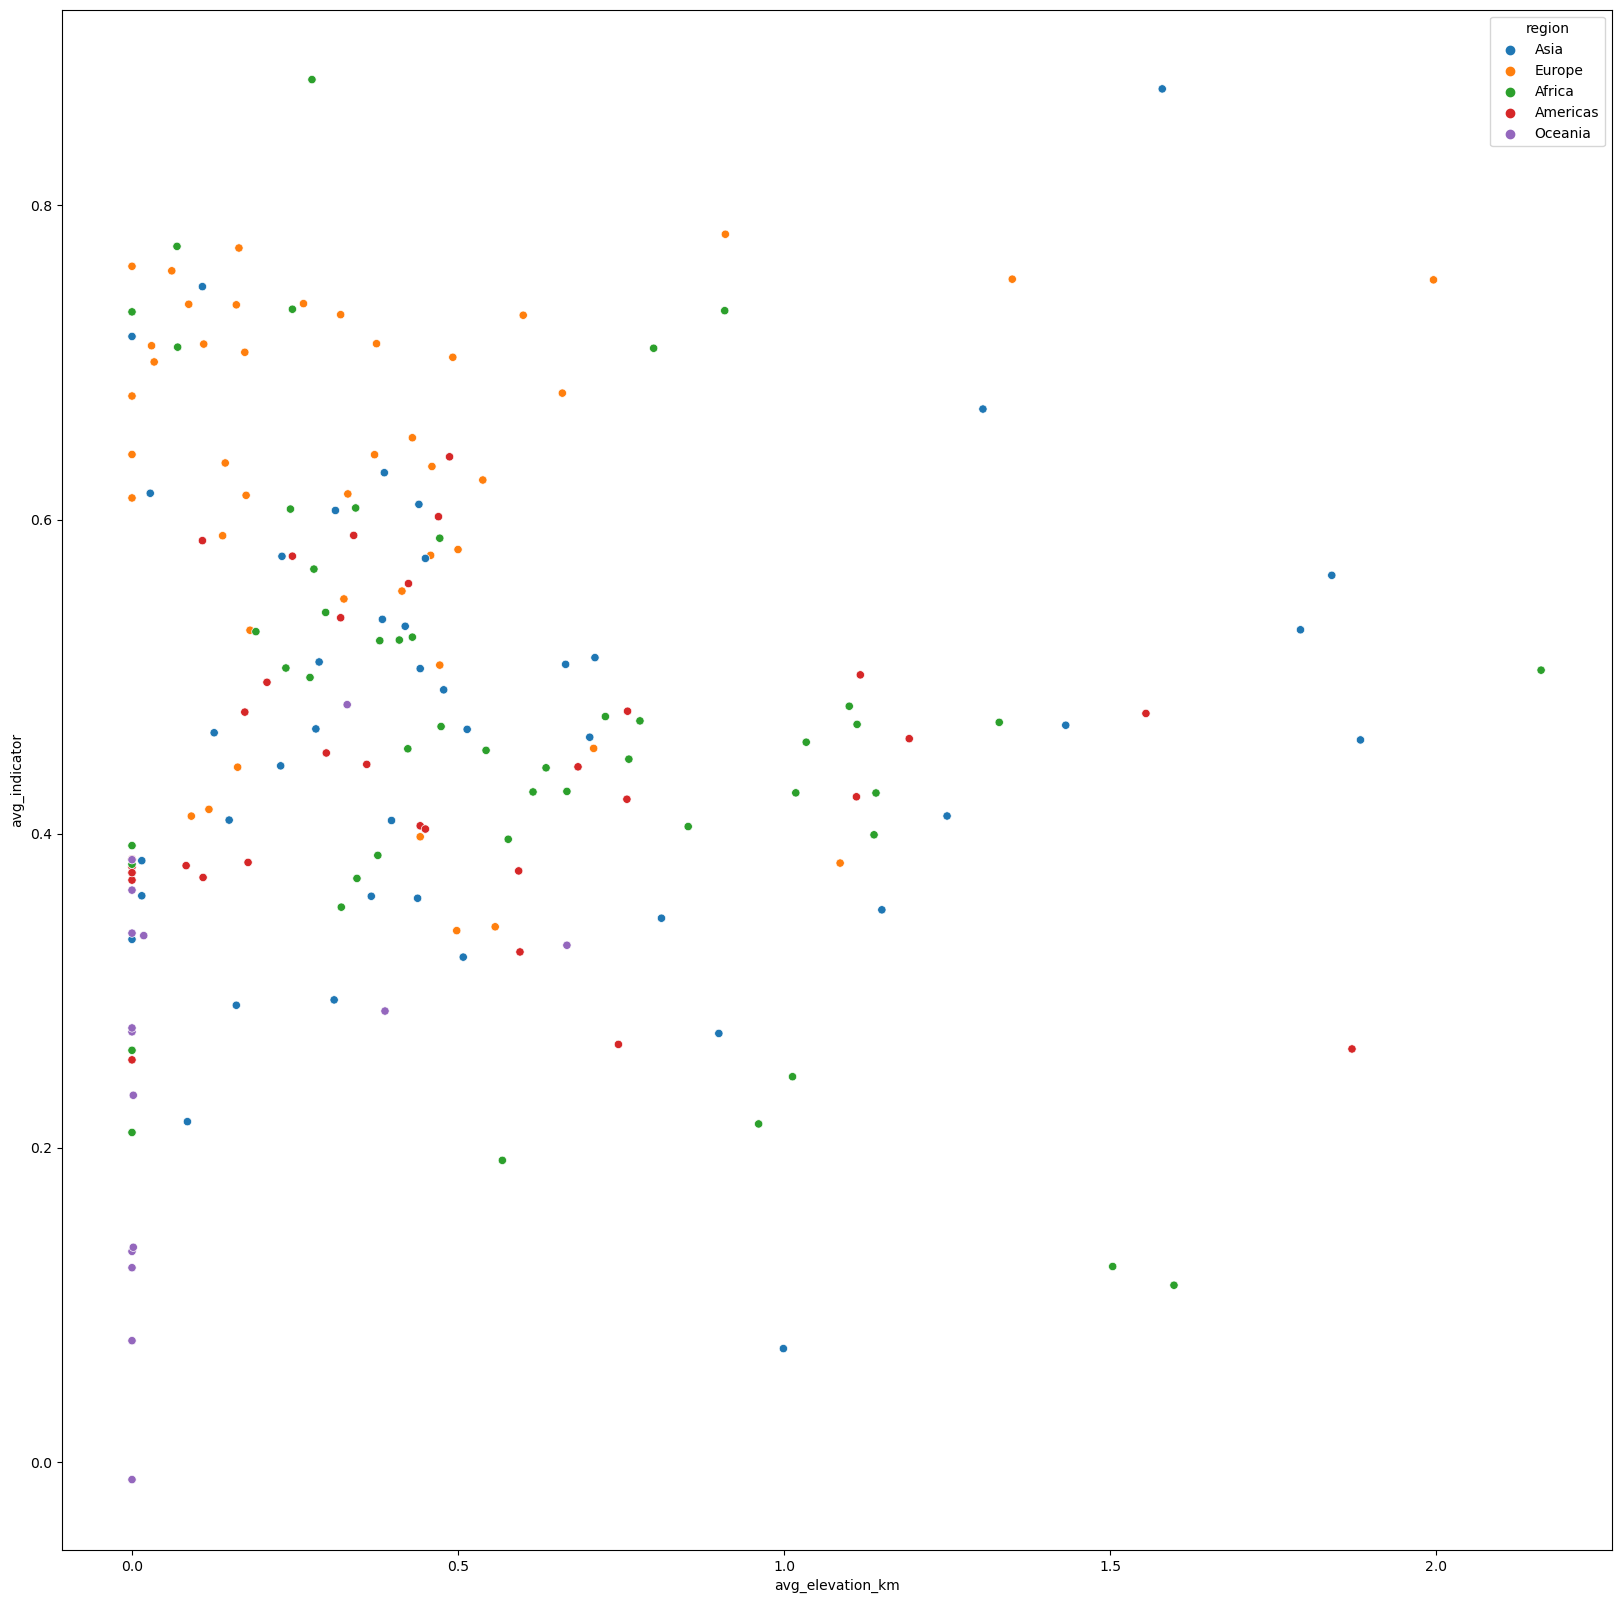

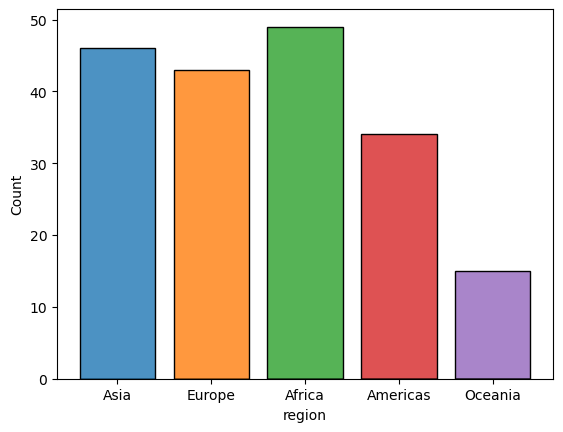

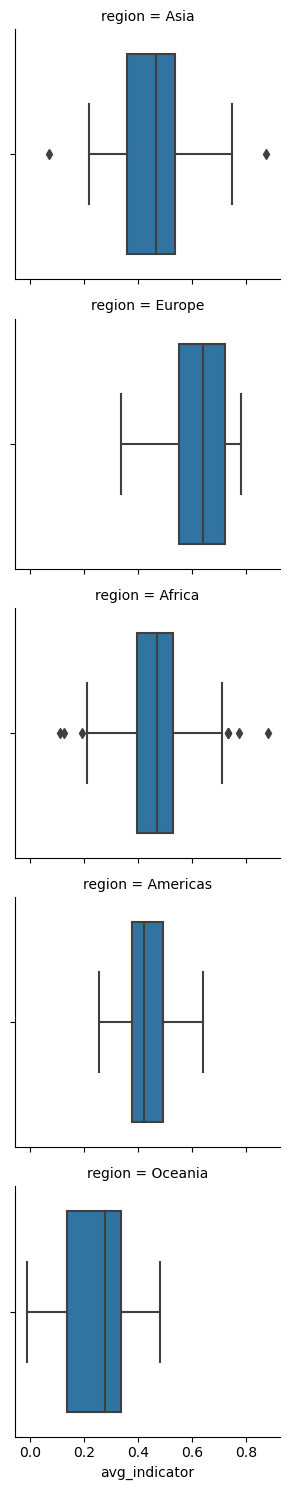

In [4]:
# descriptive statistics figures
# create filtered df to eliminate outliers
elevation_no_outliers = df[df["avg_elevation_km"] <= 2.5]

# scatterplot to find linear association
# current test: average elevation
plt.figure(figsize=(20, 20))
sns.scatterplot(data=elevation_no_outliers, x="avg_elevation_km", y="avg_indicator", hue="region")
plt.show()

# barplot of countries by region
sns.histplot(data=df, x="region", hue="region", shrink=.8, alpha=.8, legend=False)
plt.show()

# boxplot of average climate change indicators by region
n = sns.FacetGrid(df, row="region")
n.map_dataframe(sns.boxplot, x="avg_indicator")

<Axes: xlabel='avg_indicator', ylabel='Density'>

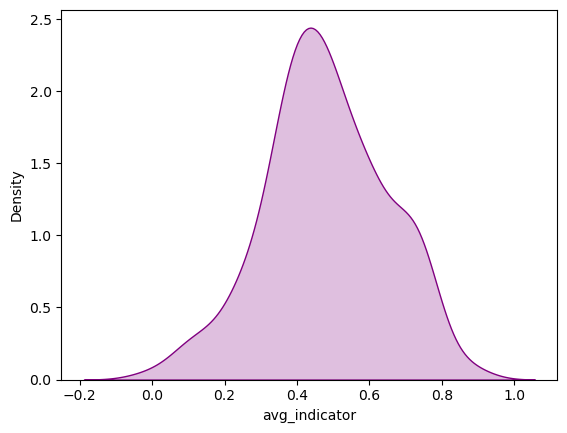

In [5]:
# density plot of avg_indicator
sns.kdeplot(data=df, x="avg_indicator", fill=True, color="purple")

/var/folders/91/1yyn3j1d7lx2tqqhmlt1wkk00000gn/T/ipykernel_214/2398820139.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


,region_id,latitude,longitude,avg_indicator,coastline_km,coast_area_ratio,percent_water,carbon_intensity_2018,population,pop_density_km,avg_elevation_km,max_elevation_km,min_elevation_km,annual_precipitation_avg_mm
region_id,1.000000,-0.493034,-0.595103,-0.247940,0.123995,0.055578,-0.059555,-0.261166,-0.145018,-0.101501,-0.191516,-0.074929,-0.033450,0.277045
latitude,-0.493034,1.000000,0.053557,0.563451,0.106605,-0.083056,0.082538,0.250084,0.041055,0.052266,-0.000881,-0.003221,-0.105477,-0.308041
longitude,-0.595103,0.053557,1.000000,-0.103060,-0.056097,0.159938,0.004748,0.105178,0.120350,0.048713,0.090347,0.004110,0.044600,-0.060591
avg_indicator,-0.247940,0.563451,-0.103060,1.000000,0.068019,-0.181329,0.105589,0.283205,-0.036536,0.041494,-0.057043,-0.058315,-0.009794,-0.180638
coastline_km,0.123995,0.106605,-0.056097,0.068019,1.000000,-0.028081,0.168935,0.087814,0.197018,-0.046170,0.025121,0.255398,-0.089555,0.027239
coast_area_ratio,0.055578,-0.083056,0.159938,-0.181329,-0.028081,1.000000,-0.091265,-0.142106,-0.044248,0.044172,-0.142104,-0.185260,-0.040972,-0.033981
percent_water,-0.059555,0.082538,0.004748,0.105589,0.168935,-0.091265,1.000000,-0.089092,0.136008,-0.053123,0.034021,0.100234,0.049075,0.120528
carbon_intensity_2018,-0.261166,0.250084,0.105178,0.283205,0.087814,-0.142106,-0.089092,1.000000,0.128326,-0.092947,0.102504,0.112099,-0.015102,-0.154569
population,-0.145018,0.041055,0.120350,-0.036536,0.197018,-0.044248,0.136008,0.128326,1.000000,-0.016243,0.100592,0.200678,-0.061090,-0.006957
pop_density_km,-0.101501,0.052266,0.048713,0.041494,-0.046170,0.044172,-0.053123,-0.092947,-0.016243,1.000000,-0.114864,-0.163489,-0.022163,-0.024361


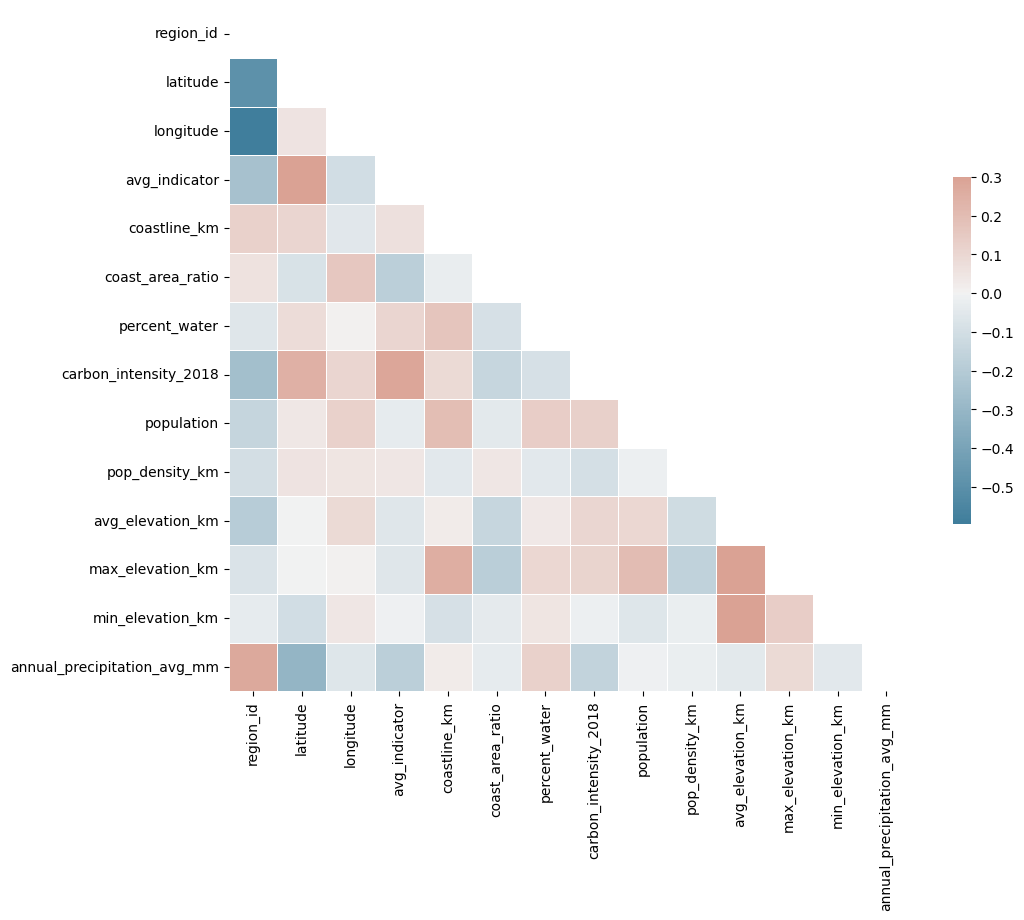

In [6]:
# correlation visual
# compute correlation matrix
corr = df.corr()

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# generate figures
f, ax = plt.subplots(figsize=(11, 9))

# generate colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# draw heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
corr

In [7]:
# split data into train and test dataframes
train, test = train_test_split(df, test_size=0.2, random_state=42)
train = train.apply(pd.to_numeric, errors='coerce')
test = test.apply(pd.to_numeric, errors='coerce')

X_train, y_train = process_data(train)
X_test, y_test = process_data(test)

X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [26]:
# create linear model
linear_model = lm.LinearRegression(fit_intercept = True)

# fit linear model
linear_model.fit(X_train, y_train)
y_fitted = linear_model.predict(X_train)
y_predicted = linear_model.predict(X_test)

185    0.399197
78     0.625164
55     0.470820
137    0.730115
161    0.730475
15     0.529492
75     0.605770
154    0.458180
122    0.077016
175    0.615410
158    0.443115
42     0.652082
165    0.448016
30     0.732246
51     0.404934
16     0.477344
166    0.425918
177    0.442262
85     0.748328
19     0.460426
124    0.633787
118    0.286951
5      0.383607
148    0.568426
24     0.507279
152    0.276180
9      0.781689
138    0.112328
135    0.616721
162    0.753082
18     0.369082
172    0.576557
76     0.415410
66     0.709787
68     0.601820
35     0.376197
97     0.471754
145    0.773967
Name: avg_indicator, dtype: float64

In [9]:
# calculate rmse
# create function to calculate rmse
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted)**2))

# use function to calculate training and test error
training_error = rmse(y_fitted, y_train)
test_error = rmse(y_predicted, y_test)
(training_error, test_error)

(0.11605766851618571, 0.15378829904912666)

In [27]:
OLS(y_train, X_train).fit().summary()

/Users/jackieobrien/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          avg_indicator   R-squared (uncentered):                   0.905
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              69.49
Date:                Sat, 11 May 2024   Prob (F-statistic):                    6.25e-58
Time:                        19:02:23   Log-Likelihood:                          68.268
No. Observations:                 149   AIC:                                     -100.5
Df Residuals:                     131   BIC:                                     -46.47
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
name                                 0          0        nan        nan           0           0
ISO3                        -4.171e-09   1.64e-09     -2.551      0.012   -7.41e-09   -9.36e-10
region                       6.005e-11   1.61e-11      3.731      0.000    2.82e-11    9.19e-11
region_id                       0.0661      0.011      6.009      0.000       0.044       0.088
latitude                        0.0069      0.001     10.037      0.000       0.006       0.008
longitude                       0.0005      0.000      1.978      0.050   -1.42e-07       0.001
coastline_km                -4.759e-07   1.16e-06     -0.410      0.682   -2.77e-06    1.82e-06
coast_area_ratio            -2.383e-06   1.28e-05     -0.186      0.853   -2.77e-05    2.29e-05
total_area                   -2.28e-07   2.63e-07     -0.866      0.388   -7.49e-07    2.93e-07
land_area                     2.74e-07   2.64e-07      1.038      0.301   -2.48e-07    7.96e-07
water_area                  -5.654e-07   4.34e-07     -1.302      0.195   -1.42e-06    2.94e-07
percent_water                   0.0077      0.004      1.754      0.082      -0.001       0.016
eco_footprint                   0.0107      0.007      1.569      0.119      -0.003       0.024
biocapacity                     0.0017      0.002      1.096      0.275      -0.001       0.005
carbon_intensity_2018           0.1885      0.079      2.385      0.019       0.032       0.345
population                  -6.876e-11   1.14e-10     -0.602      0.548   -2.95e-10    1.57e-10
pop_density_km               1.757e-05   8.38e-06      2.097      0.038    9.99e-07    3.41e-05
avg_elevation_km               -0.0112      0.036     -0.316      0.752      -0.082       0.059
max_elevation_km                0.0160      0.009      1.756      0.082      -0.002       0.034
min_elevation_km                0.2097      0.084      2.505      0.013       0.044       0.375
annual_precipitation_avg_mm  4.387e-05   1.79e-05      2.455      0.015    8.52e-06    7.92e-05
==============================================================================
Omnibus:                        0.481   Durbin-Watson:                   1.713
Prob(Omnibus):                  0.786   Jarque-Bera (JB):                0.556
Skew:                          -0.131   Prob(JB):                        0.757
Kurtosis:                       2.856   Cond. No.                          inf
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The sma